# League of Legends EDA
### 2021.11.23 회의록

- 다음 회의: 25일 목 오후 10시
- 해올꺼 : EDA 및 시각화 아이디어 짜기, 변수 전처리 

In [51]:
#필요라이브러리 다운로드 
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform 

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#그래프에서 마이너스 표시되게
matplotlib.rcParams['axes.unicode_minus']=False

import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline 

# data load

In [93]:
df = pd.read_csv('gametail_ver2.csv')
df

,Unnamed: 0,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,gameId,gameMode,gameName,gameType,gameVersion,mapId,platformId,queueId,dataVersion,matchId
0,0,17,0,0,15143,16,164,Camille,0,6,...,5560807823,CLASSIC,teambuilder-match-5560807823,MATCHED_GAME,11.22.406.3587,11,KR,420,2.0,KR_5560807823
1,1,25,1,0,18348,17,64,LeeSin,0,11,...,5560807823,CLASSIC,teambuilder-match-5560807823,MATCHED_GAME,11.22.406.3587,11,KR,420,2.0,KR_5560807823
2,2,16,0,0,13443,15,711,Vex,0,3,...,5560807823,CLASSIC,teambuilder-match-5560807823,MATCHED_GAME,11.22.406.3587,11,KR,420,2.0,KR_5560807823
3,3,18,0,2,15701,16,202,Jhin,0,8,...,5560807823,CLASSIC,teambuilder-match-5560807823,MATCHED_GAME,11.22.406.3587,11,KR,420,2.0,KR_5560807823
4,4,16,0,0,13034,15,555,Pyke,0,11,...,5560807823,CLASSIC,teambuilder-match-5560807823,MATCHED_GAME,11.22.406.3587,11,KR,420,2.0,KR_5560807823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258817,258817,3,0,0,14869,16,114,Fiora,0,3,...,5391417072,CLASSIC,teambuilder-match-5391417072,MATCHED_GAME,11.16.390.1945,11,KR,420,2.0,KR_5391417072
258818,258818,10,0,0,12122,14,59,JarvanIV,0,2,...,5391417072,CLASSIC,teambuilder-match-5391417072,MATCHED_GAME,11.16.390.1945,11,KR,420,2.0,KR_5391417072
258819,258819,6,0,0,13152,15,517,Sylas,0,2,...,5391417072,CLASSIC,teambuilder-match-5391417072,MATCHED_GAME,11.16.390.1945,11,KR,420,2.0,KR_5391417072
258820,258820,8,0,0,11221,13,523,Aphelios,0,5,...,5391417072,CLASSIC,teambuilder-match-5391417072,MATCHED_GAME,11.16.390.1945,11,KR,420,2.0,KR_5391417072


# 변수확인

In [39]:
df.info(verbose=True, null_counts=True)

<ipython-input-39-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258822 entries, 0 to 258821
Data columns (total 115 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    Unnamed: 0                      258822 non-null  int64  
 1    assists                         258822 non-null  int64  
 2    baronKills                      258822 non-null  int64  
 3    bountyLevel                     258822 non-null  int64  
 4    champExperience                 258822 non-null  int64  
 5    champLevel                      258822 non-null  int64  
 6    championId                      258822 non-null  int64  
 7    championName                    258822 non-null  object 
 8    championTransform               258822 non-null  int64  
 9    consumablesPurchased            258822 non-null  int64  
 10   damageDealtToBuildings          258782 non-null  float64
 11   damageDealtToObjectives         258822 non-null  int64  
 12   

### 필요없는 변수 제거

- championTransform : drop 케인 변신 
- doubleKills : 
- dragonKills : team 별로 합산 필요
- firstBloodAssist :  팀 내에서 과반이상(3이상)이면 인베이드 관련 지표 도출 가능. 
- firstBloodKill : 퍼블 관련 지표로 활용가능
- firstTowerAssist : drop
- firstTowerKill : firstTowerAssist 대체
- gameEndedInEarlySurrender : drop
- gameEndedInSurrender : drop
- goldEarned :
- goldSpent : drop
- individualPosition : ,drop
- inhibitorKills : 팀 별로 합산 
- inhibitorTakedowns : drop
- inhibitorsLost : drop
- item0-6: drop
- itemsPurchased : drop
- killingSprees : 횟수 (largestKillingSpree: ) 
- kills : 
- lane : drop
- largestCriticalStrike : drop
- largestKillingSpree:
- largestMultiKill : drop (doubleKills... 변수로 대체)
- longestTimeSpentLiving :
- magicDamageDealt : drop (미니언 까지 포함됨) 
- magicDamageDealtToChampions : 
- magicDamageTaken : drop
- neutralMinionsKilled : drop (정글몹 잡은거)
- nexusKills,nexusLost,nexusTakedowns : drop
- objectivesStolen : 역전 지표
- objectivesStolenAssists : drop
- participantId : drop
- pentaKills :
- physicalDamageDealt : drop
- physicalDamageDealtToChampions : ad, ap 구분 변수
- physicalDamageTaken : drop
- profileIcon : drop
- puuid : drop
- quadraKills : net_quadraKills = quadraKills, net_pentaKills= (pentaKills- quadraKills), net_doubleKills = ( doubleKills-tripleKills) 각각 net 변수 만들기

- role : drop
- sightWardsBoughtInGame - summonerName : drop
- teamId : merge 용
- teamPosition : drop
- timeCCingOthers : drop
- timePlayed : 
- totalDamageDealt : drop
- totalDamageDealtToChampions : drop
- totalDamageShieldedOnTeammates : drop
- totalDamageTaken : 
- totalHeal : drop
- totalHealsOnTeammates : drop
- totalMinionsKilled :
- totalTimeCCDealt  : timeCCingOthers 대체
- totalTimeSpentDead : 게임 후반에 죽는 것도 게임 결과에 영향
- totalUnitsHealed : drop
- tripleKills : 
- trueDamageDealt : drop
- trueDamageDealtToChampions :
- trueDamageTaken : drop
- turretKills : 팀별로 합산
- turretTakedowns : drop
- turretsLost : drop

- unrealKills : drop (거의다 0)
- visionScore : 시야 변수
- visionWardsBoughtInGame : drop
- wardsKilled : drop
- win : 
- perks.statPerks.defense -  perks.statPerks.offense : drop(룬 선택, 능력치 파편)
- gameCreation : drop
- gameId - dataVersion: drop

- perks 관련 변수 탐색

In [33]:
df['perks.statPerks.defense'].value_counts()

5002    187819
5003     56742
5001     14259
0            2
Name: perks.statPerks.defense, dtype: int64

In [34]:
df['perks.statPerks.flex'].value_counts()

5008    230931
5002     20784
5003      7105
0            2
Name: perks.statPerks.flex, dtype: int64

In [35]:
df['perks.statPerks.offense'].value_counts()

5005    144861
5008     92191
5007     21768
0            2
Name: perks.statPerks.offense, dtype: int64

In [23]:
df['championTransform'].value_counts() # 케인 변신 -> 빼도될듯

0    257667
2       694
1       461
Name: championTransform, dtype: int64

In [ ]:
# consumablesPurchased : 포션 구매여부 -> 제외 

In [ ]:
# damageDealtToBuildings : 
# damageDealtToObjectives :
# damageDealtToTurrets : -> 제외

In [24]:
df['damageSelfMitigated'].value_counts() # 받은 피해량 감소
# 상위 10% 게임 뽑아서 -> 챔피언 구성을 살펴보는 방법 
# 주로 탑 챔피언 또는 서폿..? 
# 높을 수록 탱커 챔피언일 확률이 높을 것으로 예상...?

0        136
5878      35
4877      33
3811      33
5652      32
        ... 
31278      1
27319      1
23510      1
29364      1
43580      1
Name: damageSelfMitigated, Length: 43370, dtype: int64

In [25]:
df['deaths'].value_counts() # 아웃라이어 제거 해야함 -> 20이상은 drop

5     30917
4     30539
6     28962
3     27955
7     24740
2     23226
8     20120
1     16916
9     14909
10    10633
0      9187
11     7430
12     4963
13     3298
14     1947
15     1296
16      764
17      442
18      249
19      163
20       76
21       46
23       14
22       13
24        8
25        4
28        2
26        1
27        1
30        1
Name: deaths, dtype: int64

In [ ]:
# detectorWardsPlaced:  시야 잡는 와드를 설치한 개수 -> drop
# 와드 관련 변수는  vision score변수로 대체 

# 변수삭제

In [94]:
df2 = df.drop(['Unnamed: 0','firstTowerAssist','gameEndedInEarlySurrender', 'gameEndedInSurrender','goldSpent',
               'individualPosition','inhibitorTakedowns','inhibitorsLost','item0','item1','item2','item3','item4','item5','item6',
               'itemsPurchased','lane','largestCriticalStrike','largestMultiKill','magicDamageDealt','magicDamageTaken',
               'championTransform','consumablesPurchased','damageDealtToTurrets','detectorWardsPlaced','neutralMinionsKilled',
               'nexusKills','nexusLost','nexusTakedowns','objectivesStolenAssists','participantId','physicalDamageDealt',
               'physicalDamageTaken','profileIcon','puuid','role','sightWardsBoughtInGame','spell1Casts'
               ,'spell2Casts','spell3Casts','spell4Casts','summoner1Casts','summoner1Id','summoner2Id','summonerId',
               'summonerLevel','summonerName','teamPosition','timeCCingOthers','totalDamageDealt','totalDamageDealtToChampions',
               'totalDamageShieldedOnTeammates','totalHeal','totalHealsOnTeammates','totalUnitsHealed','trueDamageDealt',
               'trueDamageTaken','turretTakedowns','turretsLost','unrealKills','visionWardsBoughtInGame','wardsKilled',
               'perks.statPerks.defense','perks.statPerks.flex','perks.statPerks.offense','gameCreation', 'gameId', 'gameMode', 
               'gameName', 'gameType', 'gameVersion', 'mapId', 'platformId', 'queueId','dataVersion'
 ],axis=1)
df2

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,damageDealtToBuildings,damageDealtToObjectives,damageSelfMitigated,...,totalDamageTaken,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,tripleKills,trueDamageDealtToChampions,turretKills,visionScore,win,matchId
0,17,0,0,15143,16,164,Camille,7819.0,13305,29765,...,33611,147,176,301,0,7630,2,25,True,KR_5560807823
1,25,1,0,18348,17,64,LeeSin,3995.0,42527,56625,...,43931,53,698,16,0,1462,2,39,True,KR_5560807823
2,16,0,0,13443,15,711,Vex,2735.0,4455,15878,...,19904,139,415,196,0,0,1,27,True,KR_5560807823
3,18,0,2,15701,16,202,Jhin,4365.0,15911,7771,...,17654,172,232,86,0,598,4,38,True,KR_5560807823
4,16,0,0,13034,15,555,Pyke,2280.0,2745,17683,...,21044,40,95,199,0,2428,0,112,True,KR_5560807823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258817,3,0,0,14869,16,114,Fiora,4471.0,4471,21936,...,24323,212,97,107,0,5691,2,12,False,KR_5391417072
258818,10,0,0,12122,14,59,JarvanIV,1256.0,17058,24095,...,26509,40,405,81,0,1484,1,21,False,KR_5391417072
258819,6,0,0,13152,15,517,Sylas,1131.0,3225,14196,...,24920,173,293,187,1,0,0,30,False,KR_5391417072
258820,8,0,0,11221,13,523,Aphelios,2322.0,5547,16390,...,19296,194,97,149,0,375,1,30,False,KR_5391417072


# kills 관련 net 변수 만들기

In [95]:
df2['net_quadraKills']  = df2['quadraKills']
df2['net_pentaKills'] = df2['pentaKills'] - df2['quadraKills']
df2['net_tripleKills'] = df2['tripleKills'] - df2['pentaKills']
df2['net_doubleKills'] = df2['doubleKills']- df2['tripleKills']

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258822 entries, 0 to 258821
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   assists                         258822 non-null  int64  
 1   baronKills                      258822 non-null  int64  
 2   bountyLevel                     258822 non-null  int64  
 3   champExperience                 258822 non-null  int64  
 4   champLevel                      258822 non-null  int64  
 5   championId                      258822 non-null  int64  
 6   championName                    258822 non-null  object 
 7   damageDealtToBuildings          258782 non-null  float64
 8   damageDealtToObjectives         258822 non-null  int64  
 9   damageSelfMitigated             258822 non-null  int64  
 10  deaths                          258822 non-null  int64  
 11  doubleKills                     258822 non-null  int64  
 12  dragonKills     

In [96]:
df3 = df2.drop(['quadraKills','pentaKills','tripleKills','doubleKills'],axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258822 entries, 0 to 258821
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   assists                         258822 non-null  int64  
 1   baronKills                      258822 non-null  int64  
 2   bountyLevel                     258822 non-null  int64  
 3   champExperience                 258822 non-null  int64  
 4   champLevel                      258822 non-null  int64  
 5   championId                      258822 non-null  int64  
 6   championName                    258822 non-null  object 
 7   damageDealtToBuildings          258782 non-null  float64
 8   damageDealtToObjectives         258822 non-null  int64  
 9   damageSelfMitigated             258822 non-null  int64  
 10  deaths                          258822 non-null  int64  
 11  dragonKills                     258822 non-null  int64  
 12  firstBloodAssist

# bool 형식 다시 코딩

In [97]:
df3['win']= df3['win'].map(lambda x : 1 if x else 0)
df3['firstBloodAssist']= df3['firstBloodAssist'].map(lambda x : 1 if x else 0)
df3['firstBloodKill']= df3['firstBloodKill'].map(lambda x : 1 if x else 0)
df3['firstTowerKill']= df3['firstTowerKill'].map(lambda x : 1 if x else 0)

In [58]:
df3['win']

0         1
1         1
2         1
3         1
4         1
         ..
258817    0
258818    0
258819    0
258820    0
258821    0
Name: win, Length: 258822, dtype: int64

In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258822 entries, 0 to 258821
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   assists                         258822 non-null  int64  
 1   baronKills                      258822 non-null  int64  
 2   bountyLevel                     258822 non-null  int64  
 3   champExperience                 258822 non-null  int64  
 4   champLevel                      258822 non-null  int64  
 5   championId                      258822 non-null  int64  
 6   championName                    258822 non-null  object 
 7   damageDealtToBuildings          258782 non-null  float64
 8   damageDealtToObjectives         258822 non-null  int64  
 9   damageSelfMitigated             258822 non-null  int64  
 10  deaths                          258822 non-null  int64  
 11  dragonKills                     258822 non-null  int64  
 12  firstBloodAssist

# 데이터 분포확인

<function matplotlib.pyplot.show(close=None, block=None)>

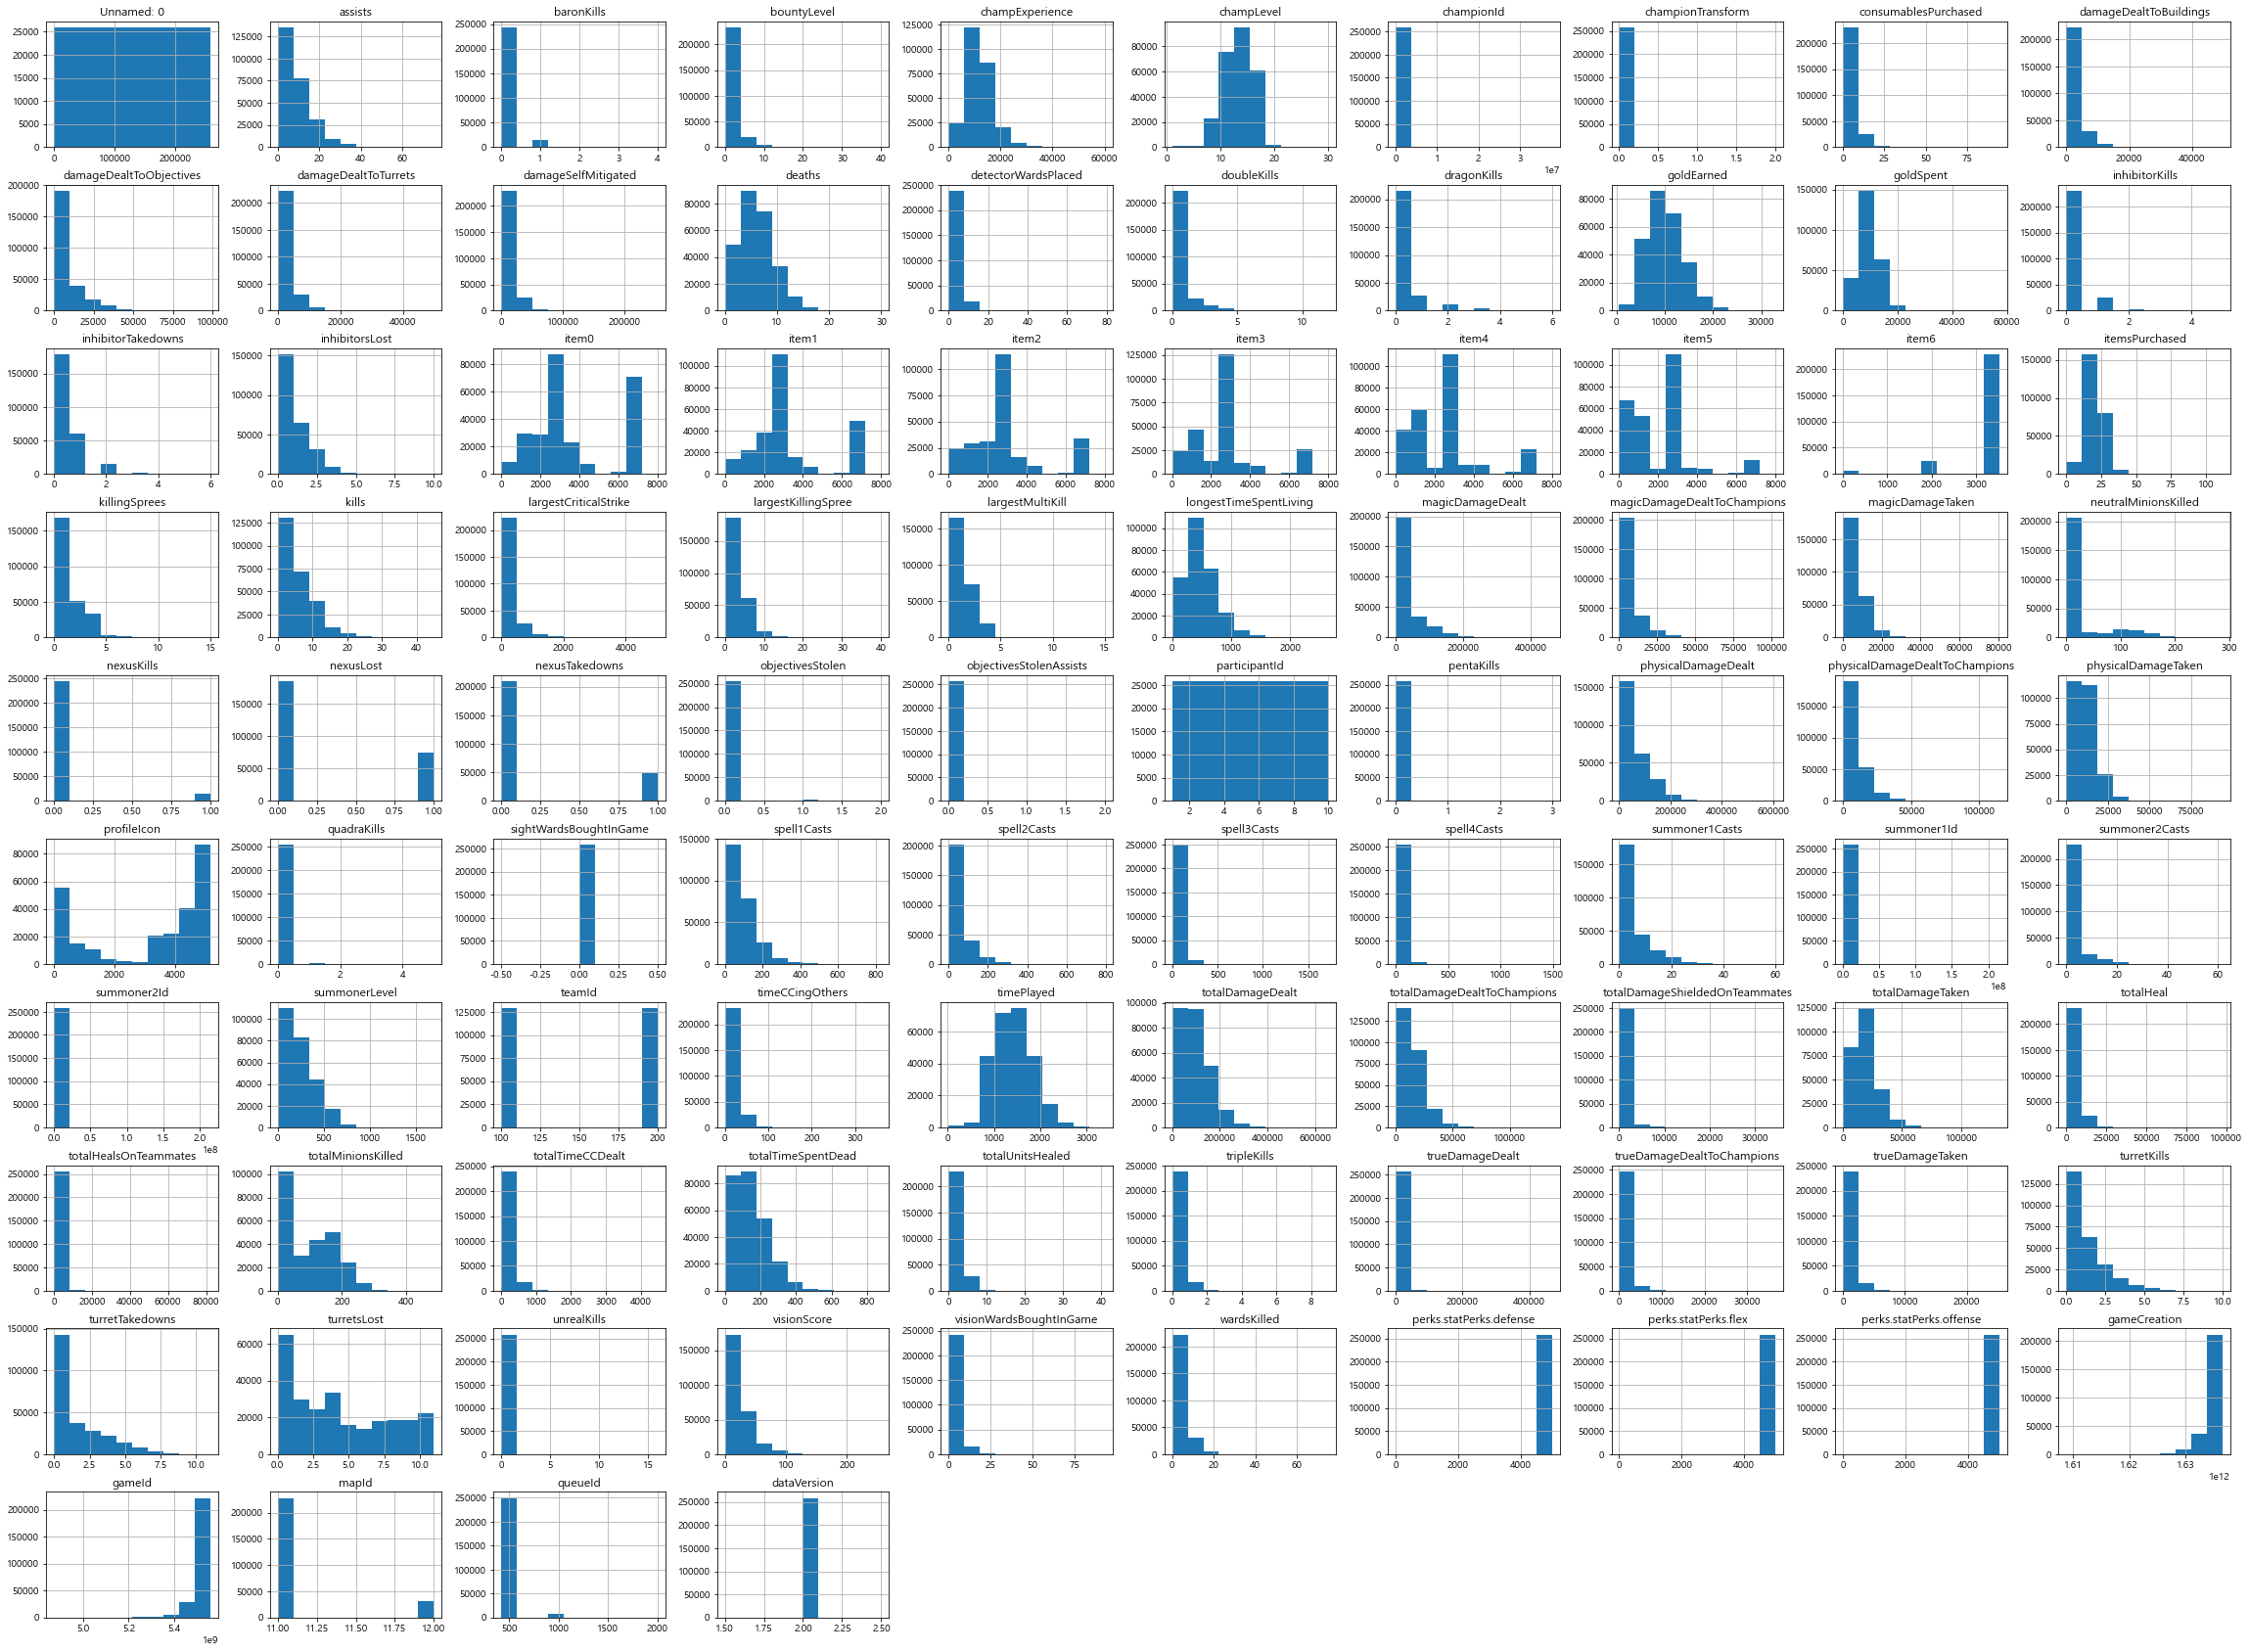

In [52]:
#데이터 시각화
df.hist(figsize=(40,30))
plt.show

# 상관계수 확인

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

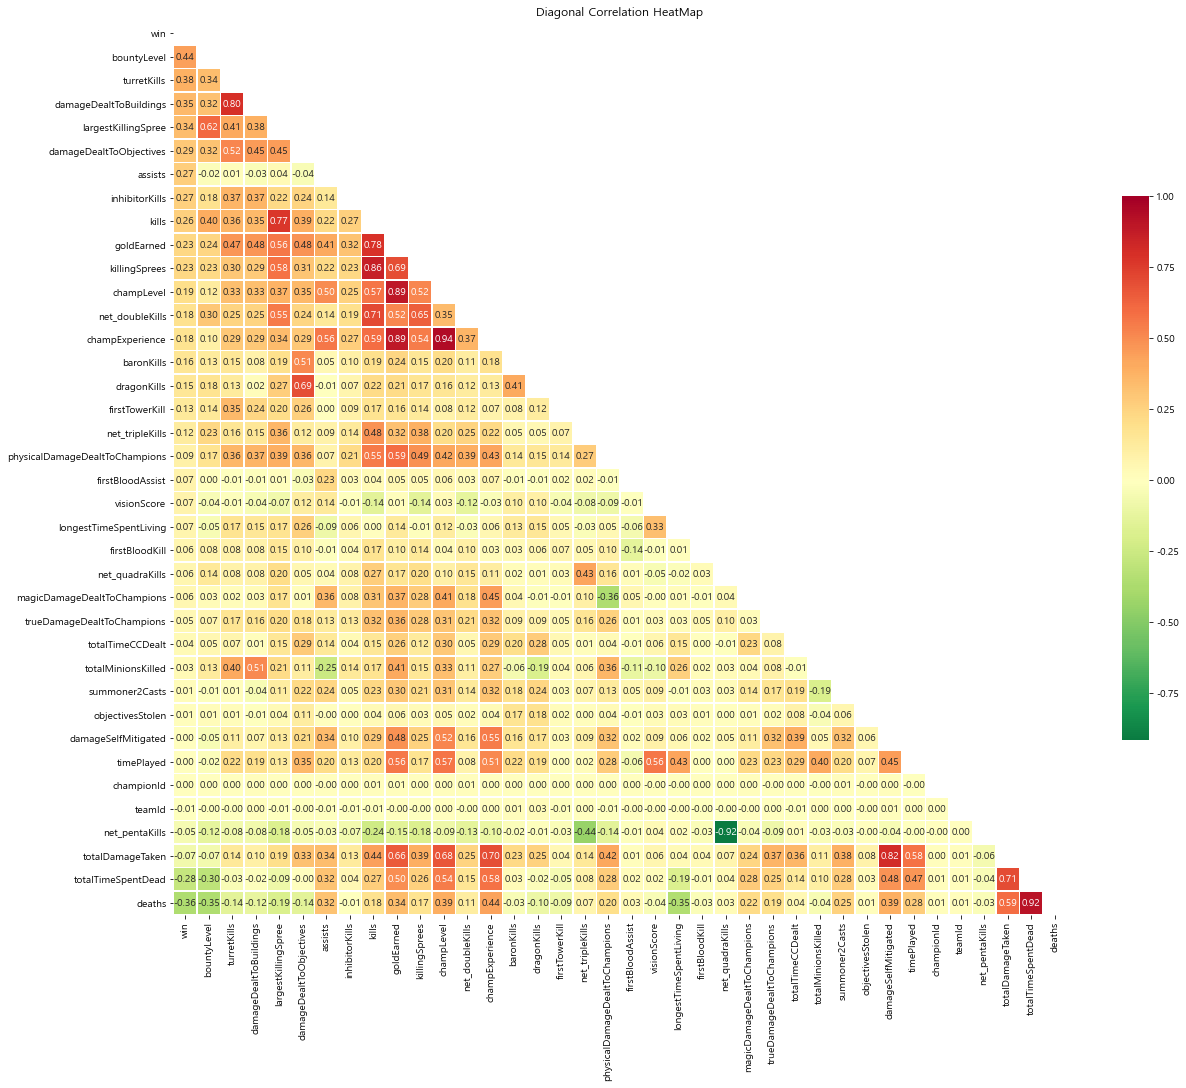

In [62]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(df3.select_dtypes(include=numerics))
regular_temp = df3[numeric_cols].copy()

# 상관관계 도출
corr_matrix = regular_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'win', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(20, 20))
corr = regular_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

# win/lose 에 따른 변수들의 평균 확인

In [98]:
df3.groupby('win').mean()

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,damageDealtToBuildings,damageDealtToObjectives,damageSelfMitigated,deaths,...,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,trueDamageDealtToChampions,turretKills,visionScore,net_quadraKills,net_pentaKills,net_tripleKills,net_doubleKills
win,,,,,,,,,,,,,,,,,,,,,
0,6.976046,0.024286,0.122565,10986.357666,12.764946,17790.778615,1238.344390,4752.280203,13439.983928,6.730144,...,97.537611,169.384926,170.478399,817.775787,0.389377,21.666033,0.006552,-0.005648,0.049205,0.349939
1,10.903296,0.109215,1.946354,12776.274588,13.924841,17828.317638,3330.976064,10380.696882,13449.559592,4.351470,...,102.780364,182.687585,115.702709,959.145296,1.300923,24.704107,0.021947,-0.017975,0.130327,0.672895


# 중간 파일 저장

In [101]:
df3.to_csv('master_1123.csv')

# 챔피언 조합 모델링

- 챔피언 조합만 넣은 채로

In [63]:
df = pd.read_csv("champ_sample4.csv")
df

,matchId,win,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,KR_4870274470,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KR_4870274470,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KR_4901175026,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KR_4901175026,1,NaN,NaN,18878.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KR_4944273316,0,NaN,NaN,NaN,NaN,2244.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,KR_5560972397,1,NaN,NaN,NaN,NaN,NaN,17533.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51713,KR_5560981091,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12354.0,NaN
51714,KR_5560981091,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11307.0,NaN,NaN
51715,KR_5560981811,0,NaN,NaN,NaN,NaN,4938.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5166.0,NaN,NaN,NaN


In [64]:
df = df.fillna(0)
df

,matchId,win,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,KR_4870274470,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,KR_4870274470,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KR_4901175026,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KR_4901175026,1,0.0,0.0,18878.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,KR_4944273316,0,0.0,0.0,0.0,0.0,2244.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,KR_5560972397,1,0.0,0.0,0.0,0.0,0.0,17533.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51713,KR_5560981091,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12354.0,0.0
51714,KR_5560981091,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11307.0,0.0,0.0
51715,KR_5560981811,0,0.0,0.0,0.0,0.0,4938.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5166.0,0.0,0.0,0.0


In [65]:
df2 = pd.read_csv("champ_sample3.csv")
df2

,matchId,win,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,KR_4870274470,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KR_4870274470,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KR_4901175026,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KR_4901175026,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KR_4944273316,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,KR_5560972397,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51713,KR_5560981091,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
51714,KR_5560981091,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
51715,KR_5560981811,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [66]:
df2 = df2.fillna(0)
df2

,matchId,win,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,KR_4870274470,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,KR_4870274470,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KR_4901175026,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KR_4901175026,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,KR_4944273316,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,KR_5560972397,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51713,KR_5560981091,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51714,KR_5560981091,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
51715,KR_5560981811,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
data = df3.drop('win', axis = 'columns')
label = df3['win']

In [71]:
from sklearn.model_selection import train_test_split #데이터 분리

#데이터 셋 분리 
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=11)

In [72]:
# 로지스틱 회귀 모델 생성
import statsmodels.api as sm
logit_m = sm.Logit(y_train, X_train)
logit_m_train = logit_m.fit(method='powell') # powell, cg, bfgs, lbfgs

Optimization terminated successfully.
         Current function value: 0.689212
         Iterations: 3
         Function evaluations: 4668


In [73]:
logit_m_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    win   No. Observations:                41373
Model:                          Logit   Df Residuals:                    41216
Method:                           MLE   Df Model:                          156
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                0.005666
Time:                        00:49:05   Log-Likelihood:                -28515.
converged:                       True   LL-Null:                       -28677.
Covariance Type:            nonrobust   LLR p-value:                 6.049e-14
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Aatrox          -0.0021      0.047     -0.045      0.964      -0.095       0.090
Ahri             0.0228      0.075      0.305      0.760      -0.124       0.170
Akali           -0.1742      0.056     -3.102      0.002      -0.284      -0.064
Akshan           0.0159      0.051      0.309      0.757      -0.085       0.117
Alistar          0.1402      0.063      2.213      0.027       0.016       0.264
Amumu           -0.0758      0.057     -1.320      0.187      -0.188       0.037
Anivia          -0.0701      0.079     -0.892      0.372      -0.224       0.084
Annie           -0.0135      0.125     -0.108      0.914      -0.258       0.231
Aphelios        -0.0876      0.039     -2.227      0.026      -0.165      -0.010
Ashe             0.1091      0.064      1.716      0.086      -0.016       0.234
AurelionSol      0.1848      0.111      1.663      0.096      -0.033       0.403
Azir             0.0054      0.084      0.064      0.949      -0.159       0.169
Bard            -0.0691      0.072     -0.955      0.339      -0.211       0.073
Blitzcrank       0.0898      0.047      1.905      0.057      -0.003       0.182
Brand           -0.0816      0.108     -0.758      0.448      -0.293       0.129
Braum            0.1535      0.071      2.170      0.030       0.015       0.292
Caitlyn          0.0828      0.052      1.606      0.108      -0.018       0.184
Camille          0.1130      0.037      3.030      0.002       0.040       0.186
Cassiopeia       0.0550      0.072      0.762      0.446      -0.086       0.196
Chogath         -0.1292      0.123     -1.047      0.295      -0.371       0.113
Corki           -0.0572      0.107     -0.532      0.594      -0.268       0.153
Darius           0.0253      0.069      0.365      0.715      -0.110       0.161
Diana           -0.0700      0.074     -0.949      0.343      -0.215       0.075
Draven           0.0044      0.056      0.078      0.938      -0.105       0.113
DrMundo         -0.0020      0.127     -0.015      0.988      -0.252       0.248
Ekko            -0.0930      0.041     -2.272      0.023      -0.173      -0.013
Elise           -0.0401      0.070     -0.577      0.564      -0.177       0.096
Evelynn          0.0391      0.094      0.415      0.678      -0.146       0.224
Ezreal          -0.0963      0.038     -2.537      0.011      -0.171      -0.022
FiddleSticks    -0.0499      0.099     -0.502      0.615      -0.244       0.145
Fiora            0.1027      0.047      2.165      0.030       0.010       0.196
Fizz             0.1877      0.083      2.250      0.024       0.024       0.351
Galio            0.0304      0.044      0.684      0.494      -0.057       0.117
Gangplank       -0.0280      0.071     -0.394      0.693      -0.167       0.111
Garen           -0.1134      0.093     -1.223      0.222      -0.295       0.068
Gnar            -0.2536      0.078     -3.270      0.001      -0.406      -0.102
Gragas          -0.0706      0.053     -1.343      0.179      -0.174       0.032
G

In [74]:
Y_predict = logit_m_train.predict(X_test)
print(Y_predict)

16808    0.470447
1412     0.565570
46235    0.438221
1716     0.534941
28387    0.462230
           ...   
31551    0.492621
30909    0.408839
2808     0.542415
26671    0.481584
46801    0.493347
Length: 10344, dtype: float64


In [75]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [76]:
# Y_predict를 threshold를 기준으로 0과 1로 나누어주는 함수 생성
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [77]:
Y_predict_t = cut_off(Y_predict,0.5)
Y_predict_t

16808    0
1412     1
46235    0
1716     1
28387    0
        ..
31551    0
30909    0
2808     1
26671    0
46801    0
Length: 10344, dtype: int32

In [78]:
# 오차행렬(confusion matirx)를 통해 예측 성능 확인
confusion_matrix(y_test, Y_predict_t)

array([[2698, 2366],
       [2617, 2663]], dtype=int64)

In [79]:
accuracy = accuracy_score(y_test, Y_predict_t)
precision = precision_score(y_test, Y_predict_t)
recall = recall_score(y_test, Y_predict_t)
f1 = f1_score(y_test, Y_predict_t)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.518
Precision : 0.530
Recall : 0.504
F1 : 0.517


In [80]:
# 임계값에 따른 비교
def perf_eval(cm):
    # Accuracy
    Accuracy = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1, ))
    # Precision
    Precision = cm[1, 1] /sum(cm[:, 1])
    # Recall
    Recall = cm[1, 1] / sum(cm[1])
    # F1-score
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return ([Accuracy, Precision, Recall, F1])

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])
for i in threshold:
    Y_predict_temp = cut_off(Y_predict,i)
    confusion_matrix_temp = confusion_matrix(y_test, Y_predict_temp)
    table.loc[i] = perf_eval(confusion_matrix_temp)
table.index.name='threshold'
table.columns.name='performance'
print(table)

performance  Accuracy  Precision    Recall        F1
threshold                                           
0.0          0.510441   0.510441  1.000000  0.675883
0.1          0.510441   0.510441  1.000000  0.675883
0.2          0.510441   0.510441  1.000000  0.675883
0.3          0.510441   0.510441  1.000000  0.675883
0.4          0.512761   0.511760  0.989015  0.674503
0.5          0.518271   0.529529  0.504356  0.516636
0.6          0.489849   0.516129  0.009091  0.017867
0.7          0.489559        NaN  0.000000       NaN
0.8          0.489559        NaN  0.000000       NaN
0.9          0.489559        NaN  0.000000       NaN


<ipython-input-80-d2e6f152c02d>:6: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision = cm[1, 1] /sum(cm[:, 1])
<ipython-input-80-d2e6f152c02d>:6: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision = cm[1, 1] /sum(cm[:, 1])
<ipython-input-80-d2e6f152c02d>:6: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision = cm[1, 1] /sum(cm[:, 1])


In [81]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.savefig('test.png')
    plt.show()

    return best_threshold

Train Accuracy: 0.5372344282503082 
Train AUC: 0.5376295231247292 
Train Confusion Matrix:
[[ 9182 11590]
 [ 7556 13045]]
Test Accuracy: 0.5195282289249806 
Test AUC: 0.5175858107137727 
Test Confusion Matrix:
[[2150 2914]
 [2056 3224]]


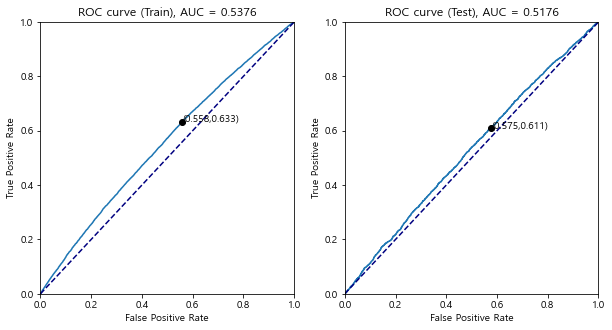

Best Threshold: 0.48819145718824664


In [82]:
best_threshold = plot_ROC(y_train_true=y_train, y_train_prob=logit_m_train.predict(X_train), 
                          y_test_true=y_test, y_test_prob=logit_m_train.predict(X_test))
print('Best Threshold:', best_threshold)

- 챔피언 조합 + 경험치

In [83]:
# 모델링
# 분석에 필요없는 변수 제거
df4 = df.drop(['matchId'], axis=1)
df4

,win,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,18878.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,2244.0,0.0,0.0,0.0,10313.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,1,0.0,0.0,0.0,0.0,0.0,17533.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51713,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12354.0,0.0
51714,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11307.0,0.0,0.0
51715,0,0.0,0.0,0.0,0.0,4938.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5166.0,0.0,0.0,0.0


In [84]:
data = df4.drop('win', axis = 'columns')
label = df4['win']

In [85]:
from sklearn.model_selection import train_test_split #데이터 분리

#데이터 셋 분리 
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=11)

In [86]:
# 로지스틱 회귀 모델 생성
import statsmodels.api as sm
logit_m = sm.Logit(y_train, X_train)
logit_m_train = logit_m.fit(method='powell') # powell, cg, bfgs, lbfgs

C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\sh921\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\sh921\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2150: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


Optimization terminated successfully.
         Current function value: 0.686412
         Iterations: 4
         Function evaluations: 14326


In [87]:
logit_m_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    win   No. Observations:                41373
Model:                          Logit   Df Residuals:                    41216
Method:                           MLE   Df Model:                          156
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                0.009705
Time:                        00:50:35   Log-Likelihood:                -28399.
converged:                       True   LL-Null:                       -28677.
Covariance Type:            nonrobust   LLR p-value:                 2.178e-46
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Aatrox        2.208e-06   3.54e-06      0.624      0.532   -4.72e-06    9.14e-06
Ahri         -3.348e-06   5.23e-06     -0.640      0.522   -1.36e-05     6.9e-06
Akali        -1.246e-05   4.04e-06     -3.085      0.002   -2.04e-05   -4.54e-06
Akshan        1.823e-06   3.93e-06      0.464      0.642   -5.87e-06    9.52e-06
Alistar       1.134e-05   5.83e-06      1.945      0.052   -8.58e-08    2.28e-05
Amumu        -9.365e-06   5.18e-06     -1.807      0.071   -1.95e-05    7.95e-07
Anivia       -1.083e-05   5.82e-06     -1.862      0.063   -2.22e-05    5.72e-07
Annie         1.564e-06   8.53e-06      0.183      0.855   -1.52e-05    1.83e-05
Aphelios     -2.112e-06   3.13e-06     -0.675      0.499   -8.24e-06    4.02e-06
Ashe          7.594e-06   4.29e-06      1.771      0.077   -8.12e-07     1.6e-05
AurelionSol   1.196e-05   8.21e-06      1.457      0.145   -4.13e-06     2.8e-05
Azir         -1.174e-06   5.69e-06     -0.206      0.837   -1.23e-05    9.99e-06
Bard         -3.122e-06   6.22e-06     -0.502      0.616   -1.53e-05    9.07e-06
Blitzcrank    5.662e-06   4.15e-06      1.365      0.172   -2.47e-06    1.38e-05
Brand        -1.154e-05   6.38e-06     -1.808      0.071    -2.4e-05    9.68e-07
Braum         2.204e-05   6.67e-06      3.302      0.001    8.96e-06    3.51e-05
Caitlyn       5.554e-06   3.68e-06      1.511      0.131   -1.65e-06    1.28e-05
Camille       1.075e-05   2.91e-06      3.698      0.000    5.05e-06    1.64e-05
Cassiopeia    4.701e-06   5.26e-06      0.894      0.372   -5.61e-06     1.5e-05
Chogath      -9.943e-06   7.29e-06     -1.364      0.173   -2.42e-05    4.34e-06
Corki        -6.098e-06   6.36e-06     -0.959      0.338   -1.86e-05    6.36e-06
Darius       -3.238e-07   5.09e-06     -0.064      0.949   -1.03e-05    9.65e-06
Diana        -5.824e-06   5.47e-06     -1.064      0.287   -1.66e-05     4.9e-06
Draven        5.933e-07   4.45e-06      0.133      0.894   -8.14e-06    9.32e-06
DrMundo      -2.304e-06   8.57e-06     -0.269      0.788   -1.91e-05    1.45e-05
Ekko         -5.661e-06   3.14e-06     -1.804      0.071   -1.18e-05     4.9e-07
Elise        -2.758e-06   6.03e-06     -0.457      0.647   -1.46e-05    9.06e-06
Evelynn       1.177e-05   6.98e-06      1.688      0.091    -1.9e-06    2.54e-05
Ezreal       -3.082e-06   2.79e-06     -1.103      0.270   -8.56e-06    2.39e-06
FiddleSticks -1.366e-06   6.96e-06     -0.196      0.844    -1.5e-05    1.23e-05
Fiora         1.269e-05   3.56e-06      3.562      0.000    5.71e-06    1.97e-05
Fizz          9.996e-06   5.97e-06      1.675      0.094    -1.7e-06    2.17e-05
Galio         1.685e-06   3.76e-06      0.448      0.654   -5.69e-06    9.06e-06
Gangplank    -2.415e-06   4.69e-06     -0.514      0.607   -1.16e-05    6.79e-06
Garen        -3.958e-06   6.56e-06     -0.603      0.546   -1.68e-05    8.91e-06
Gnar         -1.589e-05   5.57e-06     -2.852      0.004   -2.68e-05   -4.97e-06
Gragas       -2.979e-06   4.35e-06     -0.685      0.493   -1.15e-05    5.54e-06
G

In [88]:
Y_predict = logit_m_train.predict(X_test)
print(Y_predict)

16808    0.532099
1412     0.620494
46235    0.460084
1716     0.571027
28387    0.428228
           ...   
31551    0.551693
30909    0.475800
2808     0.558592
26671    0.495235
46801    0.516152
Length: 10344, dtype: float64


In [89]:
Y_predict_t = cut_off(Y_predict,0.5)
Y_predict_t

16808    1
1412     1
46235    0
1716     1
28387    0
        ..
31551    1
30909    0
2808     1
26671    0
46801    1
Length: 10344, dtype: int32

In [90]:
accuracy = accuracy_score(y_test, Y_predict_t)
precision = precision_score(y_test, Y_predict_t)
recall = recall_score(y_test, Y_predict_t)
f1 = f1_score(y_test, Y_predict_t)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.520
Precision : 0.520
Recall : 0.795
F1 : 0.629


In [91]:
# 임계값에 따른 비교
def perf_eval(cm):
    # Accuracy
    Accuracy = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1, ))
    # Precision
    Precision = cm[1, 1] /sum(cm[:, 1])
    # Recall
    Recall = cm[1, 1] / sum(cm[1])
    # F1-score
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return ([Accuracy, Precision, Recall, F1])

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])
for i in threshold:
    Y_predict_temp = cut_off(Y_predict,i)
    confusion_matrix_temp = confusion_matrix(y_test, Y_predict_temp)
    table.loc[i] = perf_eval(confusion_matrix_temp)
table.index.name='threshold'
table.columns.name='performance'
print(table)

performance  Accuracy  Precision    Recall        F1
threshold                                           
0.0          0.510441   0.510441  1.000000  0.675883
0.1          0.510441   0.510441  1.000000  0.675883
0.2          0.510441   0.510441  1.000000  0.675883
0.3          0.510538   0.510492  0.999811  0.675885
0.4          0.510344   0.510454  0.994129  0.674549
0.5          0.520205   0.519614  0.795265  0.628546
0.6          0.513148   0.653266  0.098485  0.171165
0.7          0.489946   0.558824  0.003598  0.007151
0.8          0.489656   1.000000  0.000189  0.000379
0.9          0.489559        NaN  0.000000       NaN


<ipython-input-91-d2e6f152c02d>:6: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision = cm[1, 1] /sum(cm[:, 1])


Train Accuracy: 0.5670606434147875 
Train AUC: 0.5668692299855546 
Train Confusion Matrix:
[[12737  8035]
 [ 9877 10724]]
Test Accuracy: 0.5471771075019335 
Test AUC: 0.5480903525779118 
Test Confusion Matrix:
[[2997 2067]
 [2617 2663]]


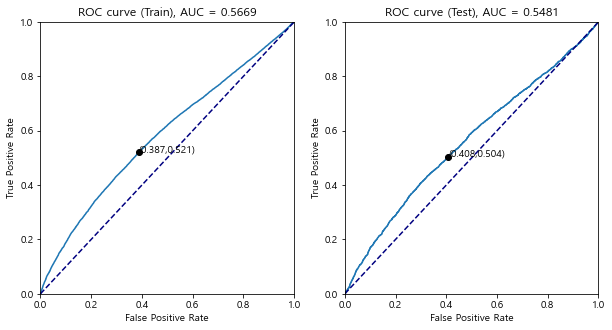

Best Threshold: 0.5342367472302669


In [92]:
best_threshold = plot_ROC(y_train_true=y_train, y_train_prob=logit_m_train.predict(X_train), 
                          y_test_true=y_test, y_test_prob=logit_m_train.predict(X_test))
print('Best Threshold:', best_threshold)